1. Create examples of zero vector, one vector, square matrix, diagonal matrix, identity matrix, and symmetric matrix one by one, and represent vectors and matrices with NumPy.

In [1]:
# Zero vector 
import numpy as np 
zero_vector = np.array([0,0,0])
print("Zero vector:",zero_vector)

Zero vector: [0 0 0]


In [2]:
#One vector
one_vector = np.array([1,1,1])
print("One vector:",one_vector)

One vector: [1 1 1]


In [3]:
#S quare matrix
square_matrix = np.array([
    [1, 2],
    [3, 4]
])
print("Square Matrix:\n", square_matrix)


Square Matrix:
 [[1 2]
 [3 4]]


In [4]:
#Diagonal Matrix
diagonal_matrix = np.diag([1, 2, 3])
print("Diagonal Matrix:\n", diagonal_matrix)


Diagonal Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]


In [5]:
#Identity Matrix

In [6]:
identity_matrix = np.eye(3)
print("Identity Matrix:\n", identity_matrix)


Identity Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
#Symmetric Matrix
symmetric_matrix = np.array([
    [1, 2, 3],
    [2, 4, 5],
    [3, 5, 6]
])
print("Symmetric Matrix:\n", symmetric_matrix)


Symmetric Matrix:
 [[1 2 3]
 [2 4 5]
 [3 5 6]]


2.	The shares of three companies A, B, and C are 1 million won, 800,000 won, and 500,000 won, respectively. We want to find the amount required to purchase 3, 4, and 5 shares of these stocks, respectively.
  
            1)Express the stocks’ price and quantity as p vector and n vector, respectively and coded with NumPy.
  
            2)The amount required to purchase stocks is expressed by multiplication, and the value is calculated by Numpy operation.


In [8]:
# 1.
import numpy as np

# Price vector
p = np.array([1_000_000, 800_000, 500_000])

# Quantity vector (number of shares)
n = np.array([3, 4, 5])

print("Price vector p:", p)
print("Quantity vector n:", n)


Price vector p: [1000000  800000  500000]
Quantity vector n: [3 4 5]


In [9]:
# 2.
# Total Cost = p.n
total_amount = np.dot(p, n) #np.dot is a NumPy function used to calculate the dot product

print("Total amount required (won):", total_amount)


Total amount required (won): 8700000


Note:- 

    (1,000,000 * 3) + (800,000 * 4) + (500000 * 5)
    = 3,000,000 + 3,200,000 + 2,500,000
    =8,700,000
          

3. When the following code is executed, all data of the MNIST numeric image is converted into vectors to create a single NumPy matrix X. Use this matrix to solve the following problem.
 from sklearn.datasets import load_digits
 X=load_digits().data

        1) Find the similarity between the first image and the tenth image using dot product.
 
 
        2) Find the similarity for a combination of all images using the dot product, how would it be efficient to implement it (hint: using matrices and multiplication of matrices).


In [11]:
from sklearn.datasets import load_digits
X = load_digits().data # X is a numpy matrix


In [12]:
# 1.
x1 = X[0]   # first image vector
x10 = X[9] # tenth image vector 
#This is because Python uses zero-based indexing


In [13]:
similarity_1_10 = np.dot(x1, x10)
print("Similarity between first and tenth image:", similarity_1_10)


Similarity between first and tenth image: 2807.0


# Note 
          1.Dot product measures similarity
          Higher value → more similar
          Lower value → less similar

          similarity=x1​⋅x10​

In [14]:
# 2 
similarity_matrix = np.dot(X, X.T) # use matrix multiplication.


4.	Calculate the following inverse matrix.


In [15]:
import numpy as np

A = np.array([[2, 0],
              [0, 1]])

A_inv = np.linalg.inv(A) #linalg stands for Linear Algebra
print(A_inv)


[[0.5 0. ]
 [0.  1. ]]


In [19]:
# or 
B = np.array([[1, 2],
              [3, 4]])

det = B[0,0]*B[1,1] - B[0,1]*B[1,0]
B_inv = (1/det) * np.array([[B[1,1], -B[0,1]],
                            [-B[1,0], B[0,0]]])


#5
The Boston house price problem is a problem of predicting the housing price of each town in Boston, USA using features such as the crime rate and air pollution in the area. It can be imported from the load_boston function. Find the weight vector x when the Boston house price problem is solved with the linear prediction model Ax=b ̂. Matrix and vector data can be obtained as follows.

Here, to simplify the problem, we limited the input data to crime rate (CRIM), air quality (NOX), number of rooms (RM), and age (AGE), and only four data were used.

Run the code below to check whether the magnitude or sign of the weight vector obtained from running the program is consistent the common notion. In order to find it, interpret the printed output for all the factors: CRIM, NOX, RM and AGE.
※ Write the interpreted output like “the house price is in inverse proportion to the crime rate (CRIM).”



In [6]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

def load_boston():
    data_url = "https://lib.stat.cmu.edu/datasets/boston"
    
    # Get data with requests
    response = requests.get(data_url, verify=False)
    content = response.text
    
    # Boston dataset column names
    feature_names = [
        'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
    ]
    
    # Process the text content
    lines = content.strip().split('\n')
    data_lines = lines[22:]  # Skip first 22 rows
    
    # Create DataFrame from text
    raw_df = pd.read_csv(StringIO('\n'.join(data_lines)), 
                         sep="\s+", 
                         header=None)
    
    # Restructure data
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    
    # Create DataFrame with features and target
    df = pd.DataFrame(data, columns=feature_names)
    df['MEDV'] = target
    
    return df

# Load the data
boston_df = load_boston()

# Display basic info
print(f"DataFrame shape: {boston_df.shape}")
print(f"\nColumns: {boston_df.columns.tolist()}")
print(f"\nFirst 3 rows:\n{boston_df.head(3)}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lib.stat.cmu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


DataFrame shape: (506, 14)

Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

First 3 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


In [12]:
boston_df
# If MEDV is the last column and you want it as target
X = boston_df.iloc[:, :-1]  # All rows, all columns except last
y = boston_df.iloc[:, -1]   # All rows, only last column

In [13]:
X,y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [14]:
import numpy as np
import pandas as pd

# Assuming boston_df is your DataFrame with all columns including MEDV
# Separate features (X) and target (y)
X = boston_df.iloc[:, :-1].values  # Convert to numpy array
y = boston_df.iloc[:, -1].values   # Convert to numpy array

# Add a column of ones for the intercept term (bias term)
# This makes the equation: w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Add column of ones

# Calculate the weight vector using normal equation
# w = (XᵀX)⁻¹Xᵀy
X_transpose = X_with_intercept.T
w = np.linalg.inv(X_transpose @ X_with_intercept) @ X_transpose @ y

print(f"Number of weights (including intercept): {len(w)}")
print(f"Weight vector w: {w}")

Number of weights (including intercept): 14
Weight vector w: [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


6.	Find the weight vector w when the Boston house price problem is solved with the linear prediction model X_w = y ̂ by the least-squares method. Matrix and vector data can be obtained as follows. 
※ This question is related to Question 5.

         import pandas as pd
         import numpy as np

         def load_boston():
         data_url = "http://lib.stat.cmu.edu/datasets/boston"
         raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,    header=None)
         data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
         target = raw_df.values[1::2, 2]
         return {'data': data, 'target': target}


         boston=load_boston()
         X=boston[‘data’]
         y=boston[‘target’]

The meaning of each column of matrix X is as follows.

        ∙	CRIM: crime rate
        ∙	INDUS: Non-retail commercial area ratio
        ∙	NOX: Nitric Oxide Concentration
        ∙	RM: Number of rooms per house
        ∙	LSTAT: Proportion of the lower class of the population
        ∙	B: Proportion of black people in the population
        ∙	PTRATIO: Student/Teacher Ratio
        ∙	ZN: Percentage of residential areas exceeding 25,000 square feet
        ∙	CHAS: 1 if located on the Charles River border, 0 otherwise
        ∙	AGE: Percentage of houses built before 1940
        ∙	RAD: Distance to radial highway
        ∙	DIS: Weighted average distance to 5 Boston Job Centers
        ∙	TAX: property tax rate

1)	Run the program above to check whether the magnitude or sign of the weight vector obtained from running the program is consistent the common notion. In order to find it, interpret the printed output for all the factors suggested above.
※ Write the interpreted output like “the house price is in inverse proportion to the crime rate (CRIM)”.

2)	Explain how the result differs from the value obtained in Question 5.
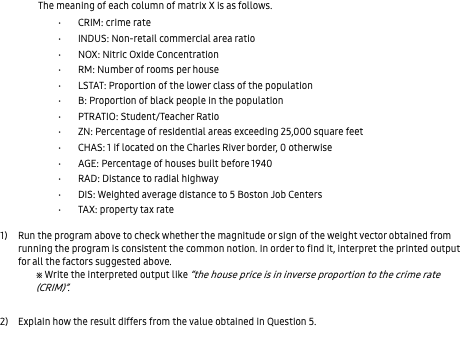!



In [17]:
# import numpy as np
# import pandas as pd

# # Assuming boston_df is already loaded
# # Separate features (X) and target (y)
# X = boston_df.iloc[:, :-1].values  # All features
# y = boston_df.iloc[:, -1].values   # Target (MEDV)

# # Add intercept term
# X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Calculate weight vector using normal equation
w = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

# Print results with interpretation
feature_names = ['Intercept'] + list(boston_df.columns[:-1])

print("="*60)
print("LINEAR REGRESSION WEIGHT VECTOR ANALYSIS")
print("="*60)
print(f"\nNumber of weights: {len(w)}")
print(f"Weight vector w:\n")

for i, (name, weight) in enumerate(zip(feature_names, w)):
    print(f"{i:2d}. {name:10s}: {weight:10.6f}", end="  ")
    
    if i == 0:
        print("[Intercept/Baseline price when all features are zero]")
    else:
        if abs(weight) < 0.1:
            print("[Negligible effect]")
        elif weight > 0:
            print("[Positive correlation with house price]")
        else:
            print("[Negative correlation with house price]")

print("\n" + "="*60)
print("INTERPRETATION OF FACTORS:")
print("="*60)

# Interpretation based on weights
interpretations = []
for name, weight in zip(boston_df.columns[:-1], w[1:]):
    if weight > 0:
        interpretations.append(f"The house price is in direct proportion to {name}")
    else:
        interpretations.append(f"The house price is in inverse proportion to {name}")

# Print interpretations
for i, interpretation in enumerate(interpretations, 1):
    print(f"{i:2d}. {interpretation} (weight: {w[i]:.6f})")

LINEAR REGRESSION WEIGHT VECTOR ANALYSIS

Number of weights: 14
Weight vector w:

 0. Intercept :  36.459488  [Intercept/Baseline price when all features are zero]
 1. CRIM      :  -0.108011  [Negative correlation with house price]
 2. ZN        :   0.046420  [Negligible effect]
 3. INDUS     :   0.020559  [Negligible effect]
 4. CHAS      :   2.686734  [Positive correlation with house price]
 5. NOX       : -17.766611  [Negative correlation with house price]
 6. RM        :   3.809865  [Positive correlation with house price]
 7. AGE       :   0.000692  [Negligible effect]
 8. DIS       :  -1.475567  [Negative correlation with house price]
 9. RAD       :   0.306049  [Positive correlation with house price]
10. TAX       :  -0.012335  [Negligible effect]
11. PTRATIO   :  -0.952747  [Negative correlation with house price]
12. B         :   0.009312  [Negligible effect]
13. LSTAT     :  -0.524758  [Negative correlation with house price]

INTERPRETATION OF FACTORS:
 1. The house price is i

In [19]:
# 1.
import numpy as np

a = np.array([4, 5, 2, 2])
b = np.array([4, 0, 2, 0])
c = np.array([2, 2, 0, 1])

# Euclidean distances
d_ab = np.linalg.norm(a - b) # np.linalg.norm is used to calculate the Euclidean length (magnitude) of a vector or distance between two vectors
d_ac = np.linalg.norm(a - c)
d_bc = np.linalg.norm(b - c)

print("Euclidean distance a-b:", d_ab)
print("Euclidean distance a-c:", d_ac)
print("Euclidean distance b-c:", d_bc) #Euclidean distance ka matlab hota hai do points (ya do vectors) ke beech ki seedhi (straight-line) distance.


Euclidean distance a-b: 5.385164807134504
Euclidean distance a-c: 4.242640687119285
Euclidean distance b-c: 3.605551275463989


#NOTE
:- 1) Euclidean Distance
Formula
𝑑
(
𝑥
,
𝑦
)
=
∑
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d(x,y)=
∑(x
i
	​

−y
i
	​

)
2
	​


In [20]:
# 2.

def cosine_distance(x, y):
    similarity = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return 1 - similarity

cd_ab = cosine_distance(a, b)
cd_ac = cosine_distance(a, c)
cd_bc = cosine_distance(b, c)

print("Cosine distance a-b:", cd_ab)
print("Cosine distance a-c:", cd_ac)
print("Cosine distance b-c:", cd_bc)


Cosine distance a-b: 0.36112343500006017
Cosine distance a-c: 0.04761904761904767
Cosine distance b-c: 0.40371520600005606


#Note
2) Cosine Distance
Formula

Cosine similarity:

cos
⁡
(
𝜃
)
=
𝑥
⋅
𝑦
∥
𝑥
∥
∥
𝑦
∥
cos(θ)=
∥x∥∥y∥
x⋅y
	​




Cosine distance
=
1
−
cos
⁡
(
𝜃
)
Cosine distance=1−cos(θ)

#8. 	Find the eigenvalues of the following matrix using the characteristic equation.

D=[■(2&1@1&2)]
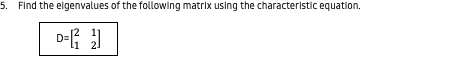!

In [2]:
import sympy as sp

# Define the symbol lambda
lam = sp.symbols('lam')

# Define the matrix D
D = sp.Matrix([[2, 1],
               [1, 2]])

# Identity matrix
I = sp.eye(2)

# Characteristic equation: |D - λI| = 0
char_eq = (D - lam * I).det()

print("Characteristic Equation:")
print(char_eq)

# Solve for eigenvalues
eigenvalues = sp.solve(char_eq, lam)

print("\nEigenvalues:")
print(eigenvalues)


ModuleNotFoundError: No module named 'sympy'

In [1]:
import sympy
print(sympy.__version__)


ModuleNotFoundError: No module named 'sympy'

In [3]:
import sympy as sp
# import sys
lam = sp.symbols('lam')

# Define the matrix D
D = sp.Matrix([[2, 1],
               [1, 2]])

# Identity matrix
I = sp.eye(2)

# Characteristic equation: |D - λI| = 0
char_eq = (D - lam * I).det()

print("Characteristic Equation:")
print(char_eq)

# Solve for eigenvalues
eigenvalues = sp.solve(char_eq, lam)

print("\nEigenvalues:")
print(eigenvalues)


ModuleNotFoundError: No module named 'sympy'

In [4]:
#9 
# Given log values
log2 = 0.69
log3 = 1.10

# Calculate log12 using log properties: log(12) = log(2^2 * 3) = 2*log2 + log3
log12 = 2 * log2 + log3

print("log 12 = ", log12)


log 12 =  2.48


In [5]:
# 10 
import numpy as np

def logistic_inverse_np(y):
    y = np.array(y)
    if np.any((y <= 0) | (y >= 1)):
        raise ValueError("All elements of y must be between 0 and 1 (exclusive).")
    return np.log(y / (1 - y))

# Example with array
y_values = [0.1, 0.5, 0.9]
x_values = logistic_inverse_np(y_values)
print(x_values)


[-2.19722458  0.          2.19722458]


In [6]:
# 11
import sympy as sp

# Define the variable and constants
x = sp.symbols('x')
k, a, b = sp.symbols('k a b')

# Function 1: f(x) = x^3 - 1
f1 = x**3 - 1
df1 = sp.diff(f1, x)
print("Derivative of f1:", df1)

# Function 2: f(x) = log(x^2 - 3k)
f2 = sp.log(x**2 - 3*k)
df2 = sp.diff(f2, x)
print("Derivative of f2:", df2)

# Function 3: f(x) = exp(a*x^b)
f3 = sp.exp(a * x**b)
df3 = sp.diff(f3, x)
print("Derivative of f3:", df3)

ModuleNotFoundError: No module named 'sympy'

#12	Find the first/second partial derivatives f_x,f_y,f_xx,f_xy,f_yx,f_yy for the following function.
f(x,y) = exp(x^2+2 y^2)

